In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2022-01-01'
end = '2024-04-10'
stock = 'TATAMOTORS.NS'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# data.reset_index(inplace=True)

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,493.500000,500.850006,492.000000,497.600006,496.053955,32748423
2022-01-04,496.799988,499.000000,484.049988,489.600006,488.078827,24100985
2022-01-05,486.950012,492.750000,483.549988,489.750000,488.228333,15420105
2022-01-06,481.500000,492.950012,477.100006,488.850006,487.331146,16563230
2022-01-07,490.049988,495.500000,483.750000,490.600006,489.075714,15532165
...,...,...,...,...,...,...
2024-04-03,1004.000000,1014.450012,992.549988,1009.150024,1009.150024,8040366
2024-04-04,1016.000000,1017.000000,998.150024,1011.599976,1011.599976,9138276
2024-04-05,1011.599976,1012.500000,1004.400024,1007.099976,1007.099976,4519120


In [ ]:
# prompt: GET THIS ALL DATA IN csv file

data.to_csv('stock_data5.csv')


In [ ]:
ma_100_days = data.Close.rolling(100).mean()

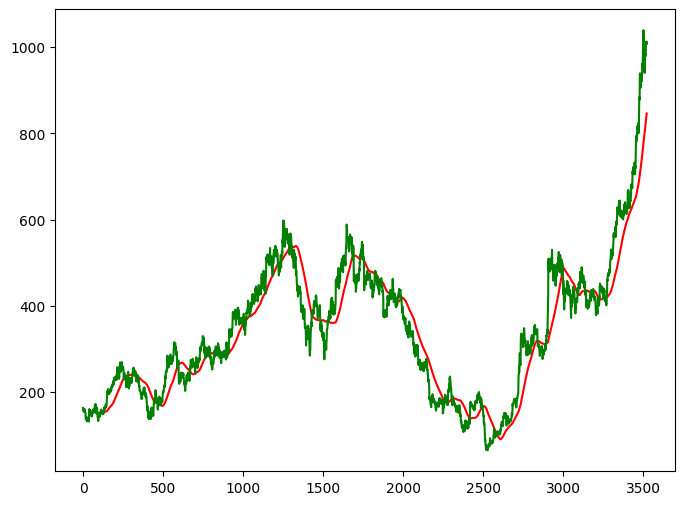

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
# plt.plot(data.High, 'b')
plt.show()

In [ ]:
ma_200_days = data.Close.rolling(200).mean()

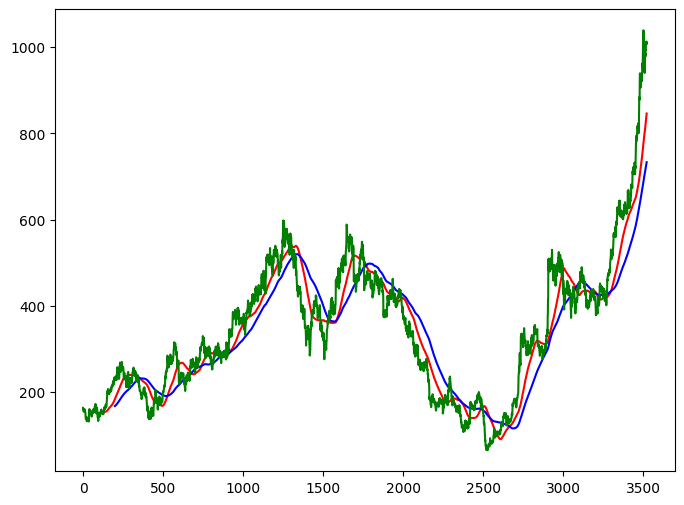

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [ ]:
data_train.shape[0]

2816

In [ ]:
data_test.shape[0]

705

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [ ]:
x, y = np.array(x), np.array(y)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x,y, epochs = 10, batch_size =32, verbose =1)

Epoch 1/10
85/85 [==============================] - 40s 470ms/step - loss: 0.0081
Epoch 2/10
85/85 [==============================] - 40s 473ms/step - loss: 0.0070
Epoch 3/10
85/85 [==============================] - 41s 482ms/step - loss: 0.0069
Epoch 4/10
85/85 [==============================] - 40s 476ms/step - loss: 0.0063
Epoch 5/10
85/85 [==============================] - 40s 470ms/step - loss: 0.0057
Epoch 6/10
85/85 [==============================] - 41s 482ms/step - loss: 0.0059
Epoch 7/10
85/85 [==============================] - 40s 473ms/step - loss: 0.0051
Epoch 8/10
85/85 [==============================] - 40s 468ms/step - loss: 0.0052
Epoch 9/10
85/85 [==============================] - 40s 475ms/step - loss: 0.0055
Epoch 10/10
85/85 [==============================] - 40s 465ms/step - loss: 0.0048


In [ ]:
model.summary()

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [ ]:
data_test_scale  =  scaler.fit_transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

In [ ]:
scale =1/scaler.scale_

In [ ]:
y_predict = y_predict*scale

In [ ]:
y = y*scale

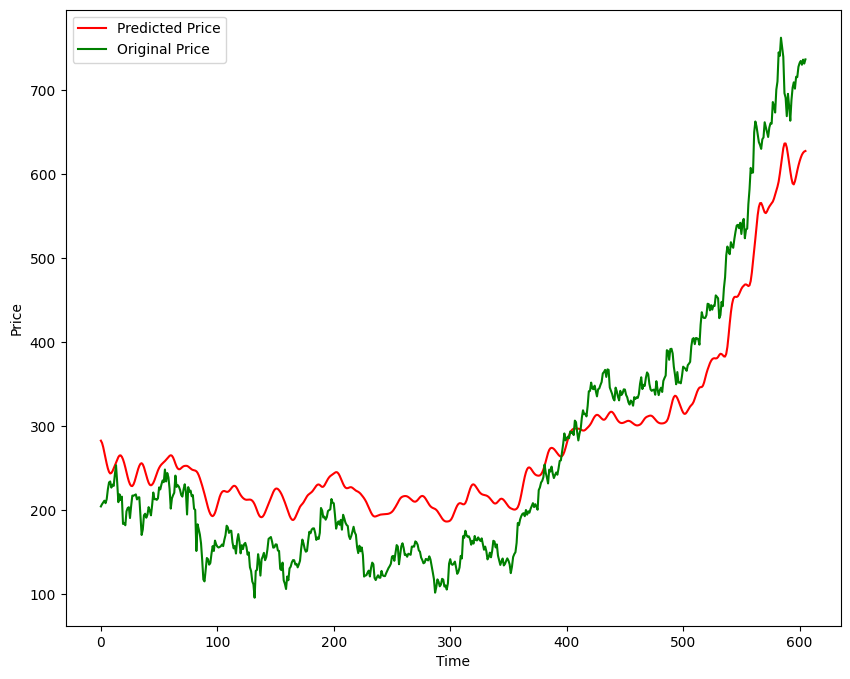

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock Predictions Model.keras')

In [ ]:
# prompt: get this Processed  output in CSV file

import pandas as pd
y_predict_df = pd.DataFrame(y_predict)
y_predict_df.to_csv('stock_predictions.csv')


In [ ]:
# import numpy as np
# import pandas as pd
# import yfinance as yf
# from keras.models import load_model
# import streamlit as st
# import matplotlib.pyplot as plt

# model = load_model("Stock Predictions Model.keras")

# st.header('Stock Market Predictor')

# stock =st.text_input('Enter Stock Symnbol', 'GOOG')
# start = '2012-01-01'
# end = '2022-12-31'

# data = yf.download(stock, start ,end)

# st.subheader('Stock Data')
# st.write(data)

# data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
# data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))

# pas_100_days = data_train.tail(100)
# data_test = pd.concat([pas_100_days, data_test], ignore_index=True)
# data_test_scale = scaler.fit_transform(data_test)

# st.subheader('Price vs MA50')
# ma_50_days = data.Close.rolling(50).mean()
# fig1 = plt.figure(figsize=(8,6))
# plt.plot(ma_50_days, 'r')
# plt.plot(data.Close, 'g')
# plt.show()
# st.pyplot(fig1)

# st.subheader('Price vs MA50 vs MA100')
# ma_100_days = data.Close.rolling(100).mean()
# fig2 = plt.figure(figsize=(8,6))
# plt.plot(ma_50_days, 'r')
# plt.plot(ma_100_days, 'b')
# plt.plot(data.Close, 'g')
# plt.show()
# st.pyplot(fig2)

# st.subheader('Price vs MA100 vs MA200')
# ma_200_days = data.Close.rolling(200).mean()
# fig3 = plt.figure(figsize=(8,6))
# plt.plot(ma_100_days, 'r')
# plt.plot(ma_200_days, 'b')
# plt.plot(data.Close, 'g')
# plt.show()
# st.pyplot(fig3)

# x = []
# y = []

# for i in range(100, data_test_scale.shape[0]):
#     x.append(data_test_scale[i-100:i])
#     y.append(data_test_scale[i,0])

# x,y = np.array(x), np.array(y)

# predict = model.predict(x)

# scale = 1/scaler.scale_

# predict = predict * scale
# y = y * scale

# st.subheader('Original Price vs Predicted Price')
# fig4 = plt.figure(figsize=(8,6))
# plt.plot(predict, 'r', label='Original Price')
# plt.plot(y, 'g', label = 'Predicted Price')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.show()
# st.pyplot(fig4)

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
# !pip install streamlit

# import numpy as np
# import pandas as pd
# import yfinance as yf
# from keras.models import load_model
# import streamlit as st
# import matplotlib.pyplot as plt

# model = load_model("Stock Predictions Model.keras")

# st.header('Stock Market Predictor')

# stock = st.text_input('Enter Stock Symbol', 'GOOG')

# start = '2012-01-01'
# end = '2022-12-31'

# data = yf.download(stock, start, end)

# st.subheader('Stock Data')
# st.write(data)

# # Prepare the data for training and testing
# data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
# data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

# # Scale the data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))

# # Create a dataset with 100 previous days' data
# pas_100_days = data_train.tail(100)
# data_test = pd.concat([pas_100_days, data_test], ignore_index=True)
# data_test_scale = scaler.fit_transform(data_test)

# # Plot the price vs MA50
# st.subheader('Price vs MA50')
# ma_50_days = data.Close.rolling(50).mean()
# fig1 = plt.figure(figsize=(8,6))
# plt.plot(ma_50_days, 'r')
# plt.plot(data.Close, 'g')
# plt.show()
# st.pyplot(fig1)

# # Plot the price vs MA50 vs MA100
# st.subheader('Price vs MA50 vs MA100')
# ma_100_days = data.Close.rolling(100).mean()
# fig2 = plt.figure

In [ ]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# bidirectional lstm
# deep lstm

In [ ]:
pip install ccxt


In [ ]:
import ccxt
import pandas as pd

# Initialize the Binance exchange
binance = ccxt.binance()

# Fetch historical OHLCV (Open, High, Low, Close, Volume) data for Bitcoin (BTC/USDT) pair
# ohlcv = binance.fetch_ohlcv('BTC/USDT', timeframe='1d', limit=100)
binance_us = ccxt.binanceus()
ohlcv = binance_us.fetch_ohlcv('BTC/USDT', timeframe='1d', limit=100)

# Convert the OHLCV data to a DataFrame
df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Print the DataFrame
print(df)


In [ ]:
# pd.DataFrame(ohlcv)

In [ ]:
# ma_100_days = ohlcv.Close.rolling(100).mean() run this code and plt.figure(figsize=(8,6))
# plt.plot(ma_100_days, 'r')
# plt.plot(data.Close, 'g')
# plt.show() and display

import pandas as pd
import matplotlib.pyplot as plt
ohlcv = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
ohlcv['timestamp'] = pd.to_datetime(ohlcv['timestamp'], unit='ms')
ma_100_days = df.close.rolling(10).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ohlcv.close, 'g')
plt.show()


In [ ]:

# Create a sample DataFrame with a "Close" column

ohlcv = pd.DataFrame(data)

# Calculate the 100-day moving average of the closing prices
ma_100_days = ohlcv['close'].rolling(100).mean()

# Plot the moving average and the closing prices
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r', label='Moving Average')
plt.plot(ohlcv['close'], 'g', label='Closing Price')
plt.legend()
plt.show()
# !curl -I https://api.binance.com/api/v3/exchangeInfo